# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [5]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [6]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [7]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n') #filtering only those elements for which x>3
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [8]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [9]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
print(s[1:])
print(s[:-1])

s = s[1:] + s[:-1]
print(s)

#operations are index-wise

a    0.124544
b   -0.172813
c   -0.235774
d    0.295614
e    0.464873
dtype: float64
b   -0.172813
c   -0.235774
d    0.295614
e    0.464873
dtype: float64
a    0.124544
b   -0.172813
c   -0.235774
d    0.295614
dtype: float64
a         NaN
b   -0.345627
c   -0.471547
d    0.591229
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [10]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15) #gives it in a good format
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-11-25
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [11]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [12]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time
print (tseries['2021-11-22':'2021-11-26'], '\n') # it is easy to navigate thruout dates...


2021-11-22 12:45:00    10.953494
2021-11-23 12:45:00     8.964501
2021-11-24 12:45:00    10.103478
2021-11-25 12:45:00    10.033056
Freq: D, dtype: float64 

2021-11-22 12:45:00    10.953494
2021-11-23 12:45:00     8.964501
Freq: D, dtype: float64 

2021-11-22 12:45:00    10.953494
2021-11-23 12:45:00     8.964501
2021-11-24 12:45:00    10.103478
2021-11-25 12:45:00    10.033056
2021-11-26 12:45:00    10.159371
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [13]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [14]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,-0.676751,0.384932,-0.551029,-1.955775
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,0.994428
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,0.631008
2021-11-22 15:45:00,0.192795,0.764797,0.601002,0.790436
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,2.368380
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,3.009443
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,0.751461
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,0.330702
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,1.120129
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,2.138526


or by means of a dictionary:


In [15]:
df2 = pd.DataFrame(
    { 'A' : 1., #it broadcats it to all rows
      'B' : pd.Timestamp('20130102'), #same here, broadcasts it
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]), #used in ML for labels/ train_test identification
    }
    )
df2


#indexes in this case are given by default
# check what happens if D and E had different lengths: error, must be same length!!

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [16]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,-0.676751,0.384932,-0.551029,-1.955775
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,0.994428


In [17]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,0.751461
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,0.330702
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,1.120129
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,2.138526


In [18]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[-0.67675067,  0.38493214, -0.55102901, -1.95577539],
       [ 1.11359385,  1.08844532, -1.65951426,  0.99442767],
       [ 0.57827621,  0.42600185, -1.79946187,  0.63100847],
       [ 0.19279473,  0.76479668,  0.60100203,  0.79043638],
       [ 0.22348358,  1.38303572, -0.88265308,  2.36838009],
       [ 0.76315666, -0.21800139,  1.07721056,  3.00944277],
       [ 1.10375441, -0.12792611, -0.15304495,  0.75146085],
       [-0.43452593, -0.00816245,  0.16399169,  0.33070175],
       [-0.98829866, -1.90257503, -0.5085154 ,  1.12012888],
       [-0.58831197, -1.18793556, -0.25481877,  2.13852624]])

In [21]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.128717,0.060261,-0.396683,1.017874
std,0.764944,1.003920,0.906557,1.359912
min,-0.988299,-1.902575,-1.799462,-1.955775
25%,-0.549865,-0.195483,-0.799747,0.661122
50%,0.208139,0.188385,-0.381667,0.892432
75%,0.716937,0.680098,0.084733,1.883927
max,1.113594,1.383036,1.077211,3.009443


In [22]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,-0.676751,1.113594,0.578276,0.192795,0.223484,0.763157,1.103754,-0.434526,-0.988299,-0.588312
B,0.384932,1.088445,0.426002,0.764797,1.383036,-0.218001,-0.127926,-0.008162,-1.902575,-1.187936
C,-0.551029,-1.659514,-1.799462,0.601002,-0.882653,1.077211,-0.153045,0.163992,-0.508515,-0.254819
D,-1.955775,0.994428,0.631008,0.790436,2.368380,3.009443,0.751461,0.330702,1.120129,2.138526


In [23]:
df.sort_index(axis=0,ascending=True) #sort==ordinare per

,A,B,C,D
2021-11-22 12:45:00,-0.676751,0.384932,-0.551029,-1.955775
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,0.994428
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,0.631008
2021-11-22 15:45:00,0.192795,0.764797,0.601002,0.790436
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,2.368380
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,3.009443
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,0.751461
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,0.330702
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,1.120129
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,2.138526


In [24]:
df.sort_values(by="C") 

,A,B,C,D
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,0.631008
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,0.994428
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,2.368380
2021-11-22 12:45:00,-0.676751,0.384932,-0.551029,-1.955775
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,1.120129
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,2.138526
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,0.751461
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,0.330702
2021-11-22 15:45:00,0.192795,0.764797,0.601002,0.790436
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,3.009443


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [25]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..(e.g. "Enviroment T"))
print (df.A)

2021-11-22 12:45:00   -0.676751
2021-11-22 13:45:00    1.113594
2021-11-22 14:45:00    0.578276
2021-11-22 15:45:00    0.192795
2021-11-22 16:45:00    0.223484
2021-11-22 17:45:00    0.763157
2021-11-22 18:45:00    1.103754
2021-11-22 19:45:00   -0.434526
2021-11-22 20:45:00   -0.988299
2021-11-22 21:45:00   -0.588312
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00   -0.676751
2021-11-22 13:45:00    1.113594
2021-11-22 14:45:00    0.578276
2021-11-22 15:45:00    0.192795
2021-11-22 16:45:00    0.223484
2021-11-22 17:45:00    0.763157
2021-11-22 18:45:00    1.103754
2021-11-22 19:45:00   -0.434526
2021-11-22 20:45:00   -0.988299
2021-11-22 21:45:00   -0.588312
Freq: H, Name: A, dtype: float64


In [26]:
# selecting rows by counting
print (df[0:3]) 

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00 -0.676751  0.384932 -0.551029 -1.955775
2021-11-22 13:45:00  1.113594  1.088445 -1.659514  0.994428
2021-11-22 14:45:00  0.578276  0.426002 -1.799462  0.631008
                            A         B         C         D
2021-11-22 12:45:00 -0.676751  0.384932 -0.551029 -1.955775
2021-11-22 13:45:00  1.113594  1.088445 -1.659514  0.994428
2021-11-22 14:45:00  0.578276  0.426002 -1.799462  0.631008


### Selection by label

In [27]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.676751
B    0.384932
C   -0.551029
D   -1.955775
Name: 2021-11-22 12:45:00, dtype: float64

In [28]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,-0.676751,0.384932
2021-11-22 13:45:00,1.113594,1.088445
2021-11-22 14:45:00,0.578276,0.426002
2021-11-22 15:45:00,0.192795,0.764797
2021-11-22 16:45:00,0.223484,1.383036
2021-11-22 17:45:00,0.763157,-0.218001
2021-11-22 18:45:00,1.103754,-0.127926
2021-11-22 19:45:00,-0.434526,-0.008162
2021-11-22 20:45:00,-0.988299,-1.902575
2021-11-22 21:45:00,-0.588312,-1.187936


In [29]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,0.223484,1.383036
2021-11-22 17:45:00,0.763157,-0.218001
2021-11-22 18:45:00,1.103754,-0.127926


In [30]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.1135938518140243
1.1135938518140243


### Selecting by position

In [31]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.192795
B    0.764797
C    0.601002
D    0.790436
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00  0.192795  0.764797
2021-11-22 16:45:00  0.223484  1.383036


In [32]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,1.113594,-1.659514
2021-11-22 14:45:00,0.578276,-1.799462
2021-11-22 16:45:00,0.223484,-0.882653


In [33]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  1.113594  1.088445 -1.659514  0.994428
2021-11-22 14:45:00  0.578276  0.426002 -1.799462  0.631008 

                            B         C
2021-11-22 12:45:00  0.384932 -0.551029
2021-11-22 13:45:00  1.088445 -1.659514
2021-11-22 14:45:00  0.426002 -1.799462
2021-11-22 15:45:00  0.764797  0.601002
2021-11-22 16:45:00  1.383036 -0.882653
2021-11-22 17:45:00 -0.218001  1.077211
2021-11-22 18:45:00 -0.127926 -0.153045
2021-11-22 19:45:00 -0.008162  0.163992
2021-11-22 20:45:00 -1.902575 -0.508515
2021-11-22 21:45:00 -1.187936 -0.254819


In [34]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


1.088445321438451

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [35]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 12:45:00,-0.676751,0.384932,-0.551029,-1.955775
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,0.994428
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,0.631008
2021-11-22 15:45:00,0.192795,0.764797,0.601002,0.790436
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,2.368380


In [36]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,NaN,0.384932,NaN,NaN
2021-11-22 13:45:00,1.113594,1.088445,NaN,0.994428
2021-11-22 14:45:00,0.578276,0.426002,NaN,0.631008
2021-11-22 15:45:00,0.192795,0.764797,0.601002,0.790436
2021-11-22 16:45:00,0.223484,1.383036,NaN,2.368380
2021-11-22 17:45:00,0.763157,NaN,1.077211,3.009443
2021-11-22 18:45:00,1.103754,NaN,NaN,0.751461
2021-11-22 19:45:00,NaN,NaN,0.163992,0.330702
2021-11-22 20:45:00,NaN,NaN,NaN,1.120129
2021-11-22 21:45:00,NaN,NaN,NaN,2.138526


### Setting

Combination of selection and setting of values

In [37]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brand new column
df['E'] = np.arange(len(df))*0.5

# defining a brand new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [38]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,0,1.000000
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,5,0.5,2,0.999962
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,5,1.0,4,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6,0.999657
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,5,2.0,8,0.999391
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,5,2.5,10,0.999048
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,5,4.5,18,0.996917


In [39]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.384932,-0.551029,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-1.113594,-1.088445,-1.659514,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.578276,-0.426002,-1.799462,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-0.192795,-0.764797,-0.601002,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.223484,-1.383036,-0.882653,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.763157,-0.218001,-1.077211,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-1.103754,-0.127926,-0.153045,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,-0.163992,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,-5,-4.5,-18,-0.996917


In [40]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,0,1.000000
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,5,0.5,2,0.999962
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,5,1.0,4,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6,0.999657
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,5,2.0,8,0.999391
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,5,2.5,10,0.999048
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [41]:
# Dropping by column
df.drop(['E prime'], axis=1) #it doesn't affect df

#to really drop it you need to copy the dropped dataframe into a new one 
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,1.000000
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,5,0.5,0.999962
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,5,1.0,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,0.999657
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,5,2.0,0.999391
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,5,2.5,0.999048
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,5,3.0,0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,5,3.5,0.998135
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,5,4.0,0.997564
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,5,4.5,0.996917


In [42]:
# Dropping by rows
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,0,1.000000
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,5,2.5,10,0.999048
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,5,4.5,18,0.996917


In [43]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,0,1.000000
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,5,0.5,2,0.999962
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,5,1.0,4,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6,0.999657
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,5,2.0,8,0.999391
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,5,2.5,10,0.999048
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,5,4.5,18,0.996917


In [44]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,0,1.000000
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,5,0.5,2,0.999962
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,5,1.0,4,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6,0.999657
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,5,2.0,8,0.999391
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,5,2.5,10,0.999048
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,5,3.5,14,0.998135
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [45]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.384932,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.113594,1.088445,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.578276,0.426002,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.223484,1.383036,NaN,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.763157,NaN,1.077211,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.103754,NaN,NaN,5,3.0,12.0,0.998630
2021-11-22 19:45:00,NaN,NaN,0.163992,5,3.5,14.0,0.998135
2021-11-22 20:45:00,NaN,NaN,NaN,5,4.0,16.0,0.997564
2021-11-22 21:45:00,NaN,NaN,NaN,5,4.5,18.0,0.996917


In [46]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6.0,0.999657


In [47]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,False,True,False,True,True,False
2021-11-22 13:45:00,False,False,True,False,False,False,False
2021-11-22 14:45:00,False,False,True,False,False,False,False
2021-11-22 15:45:00,False,False,False,False,False,False,False
2021-11-22 16:45:00,False,False,True,False,False,False,False
2021-11-22 17:45:00,False,True,False,False,False,False,False
2021-11-22 18:45:00,False,True,True,False,False,False,False
2021-11-22 19:45:00,True,True,False,False,False,False,False
2021-11-22 20:45:00,True,True,True,False,False,False,False
2021-11-22 21:45:00,True,True,True,False,False,False,False


In [48]:
# filling missing data
df_wNan.fillna(value=0) #puts a value instead of Nan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,1.113594,1.088445,0.000000,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.578276,0.426002,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.223484,1.383036,0.000000,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.763157,0.000000,1.077211,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.103754,0.000000,0.000000,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.000000,0.000000,0.163992,5,3.5,14.0,0.998135
2021-11-22 20:45:00,0.000000,0.000000,0.000000,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.000000,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [49]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.384932,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.113594,1.088445,NaN,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.578276,0.426002,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.223484,1.383036,0.601002,5,2.0,8.0,0.999391
2021-11-22 17:45:00,0.763157,1.383036,1.077211,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.103754,1.383036,1.077211,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.103754,1.383036,0.163992,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.103754,1.383036,0.163992,5,4.0,16.0,0.997564
2021-11-22 21:45:00,1.103754,1.383036,0.163992,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [50]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.196392
B          0.060261
C         -0.396683
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.833415
2021-11-22 13:45:00    1.291784
2021-11-22 14:45:00    1.457809
2021-11-22 15:45:00    2.151179
2021-11-22 16:45:00    2.389037
2021-11-22 17:45:00    2.874488
2021-11-22 18:45:00    3.117345
2021-11-22 19:45:00    3.317063
2021-11-22 20:45:00    3.228311
2021-11-22 21:45:00    3.780836
Freq: H, dtype: float64 



In [51]:
# global operations on columns
df.apply(np.cumsum) #cumulative sum

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,0,1.000000
2021-11-22 13:45:00,1.113594,1.473377,-2.210543,10,0.5,2,1.999962
2021-11-22 14:45:00,1.691870,1.899379,-4.010005,15,1.5,6,2.999810
2021-11-22 15:45:00,1.884665,2.664176,-3.409003,20,3.0,12,3.999467
2021-11-22 16:45:00,2.108148,4.047212,-4.291656,25,5.0,20,4.998858
2021-11-22 17:45:00,2.871305,3.829210,-3.214446,30,7.5,30,5.997906
2021-11-22 18:45:00,3.975059,3.701284,-3.367491,35,10.5,42,6.996536
2021-11-22 19:45:00,3.540534,3.693122,-3.203499,40,14.0,56,7.994670
2021-11-22 20:45:00,2.552235,1.790547,-3.712014,45,18.0,72,8.992234
2021-11-22 21:45:00,1.963923,0.602611,-3.966833,50,22.5,90,9.989152


In [52]:
df #nothing changed bc we didn't copy it into another df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.384932,-0.551029,5,0.0,0,1.000000
2021-11-22 13:45:00,1.113594,1.088445,-1.659514,5,0.5,2,0.999962
2021-11-22 14:45:00,0.578276,0.426002,-1.799462,5,1.0,4,0.999848
2021-11-22 15:45:00,0.192795,0.764797,0.601002,5,1.5,6,0.999657
2021-11-22 16:45:00,0.223484,1.383036,-0.882653,5,2.0,8,0.999391
2021-11-22 17:45:00,0.763157,-0.218001,1.077211,5,2.5,10,0.999048
2021-11-22 18:45:00,1.103754,-0.127926,-0.153045,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.434526,-0.008162,0.163992,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.988299,-1.902575,-0.508515,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.588312,-1.187936,-0.254819,5,4.5,18,0.996917


In [53]:
df.apply(lambda x: x.max() - x.min())

A           2.101893
B           3.285611
C           2.876672
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [54]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00    0.384932
2021-11-22 13:45:00    2.202039
2021-11-22 14:45:00    1.004278
2021-11-22 15:45:00    0.957591
2021-11-22 16:45:00    1.606519
2021-11-22 17:45:00    0.545155
2021-11-22 18:45:00    0.975828
2021-11-22 19:45:00   -0.442688
2021-11-22 20:45:00   -2.890874
2021-11-22 21:45:00   -1.776248
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [55]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

#superfast

--2021-11-25 17:07:32--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-25 17:07:32--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30bfde21a1968a057f7c797446.dl.dropboxusercontent.com/cd/0/inline/BapKeuVHm0QQPa9fKIjEhTjr5eWF0d9StglkopDxewYFN3nuTwxcCUX_b0AJkQyIPy-z-s3mIFzCzT9LgIDUasqTmkmEC32CIguU4ALoxthoFj9qoUIFMfs8awiEmS33EeZ_UZi-uZ9MTmELdYyvVtY-/file# [following]
--2021-11-25 17:07:33--  https://uc30bfde21a1968a057f7c797446.dl.dropboxusercontent.com/cd/0/inline/BapKeuVHm0QQPa9fKIjEhTjr5eWF0d9StglkopDxewYFN3nuTwxcCUX_b0AJkQyIPy-z-s3mIFzCzT9LgIDUasqTmkmEC32CIguU4ALoxth

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [56]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [57]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [58]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [59]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.619479,0.547353,1.323934,0.086477
1,-0.141921,0.439896,-1.081484,-0.549202
2,-0.394556,0.224480,0.775481,-2.439153
3,1.589800,-0.492617,0.687198,-0.148277
4,0.734987,-1.286359,0.193059,0.162922
5,0.312981,0.112142,-1.044952,-0.429328
6,1.507399,-0.777027,-1.061995,0.098330
7,-0.690229,1.466869,-0.264328,-0.429240
8,-0.350560,-0.741260,0.890192,0.019186
9,0.598495,-0.614574,0.077395,0.613231


In [60]:
# divide it into pieaces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.619479  0.547353  1.323934  0.086477
 1 -0.141921  0.439896 -1.081484 -0.549202
 2 -0.394556  0.224480  0.775481 -2.439153,
           0         1         2         3
 3  1.589800 -0.492617  0.687198 -0.148277
 4  0.734987 -1.286359  0.193059  0.162922
 5  0.312981  0.112142 -1.044952 -0.429328
 6  1.507399 -0.777027 -1.061995  0.098330,
           0         1         2         3
 7 -0.690229  1.466869 -0.264328 -0.429240
 8 -0.350560 -0.741260  0.890192  0.019186
 9  0.598495 -0.614574  0.077395  0.613231]

In [61]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.619479,0.547353,1.323934,0.086477
1,-0.141921,0.439896,-1.081484,-0.549202
2,-0.394556,0.224480,0.775481,-2.439153
3,1.589800,-0.492617,0.687198,-0.148277
4,0.734987,-1.286359,0.193059,0.162922
5,0.312981,0.112142,-1.044952,-0.429328
6,1.507399,-0.777027,-1.061995,0.098330
7,-0.690229,1.466869,-0.264328,-0.429240
8,-0.350560,-0.741260,0.890192,0.019186
9,0.598495,-0.614574,0.077395,0.613231


In [62]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.619479,0.547353,1.323934,0.086477
1,-0.141921,0.439896,-1.081484,-0.549202
2,-0.394556,0.224480,0.775481,-2.439153
3,1.589800,-0.492617,0.687198,-0.148277
4,0.734987,-1.286359,0.193059,0.162922
5,0.312981,0.112142,-1.044952,-0.429328
6,1.507399,-0.777027,-1.061995,0.098330
7,-0.690229,1.466869,-0.264328,-0.429240
8,-0.350560,-0.741260,0.890192,0.019186
9,0.598495,-0.614574,0.077395,0.613231


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [63]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [64]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.062020,-0.693667
1,bar,one,-2.101264,-0.420805
2,foo,two,0.510309,-1.132014
3,bar,three,2.213280,0.089376
4,foo,two,-1.232647,-0.761597
5,bar,two,-0.650672,-0.363262
6,foo,one,1.037897,-0.072706
7,foo,three,1.713272,0.200043


In [65]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.538655,-0.69469
foo,2.090851,-2.45994


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [66]:
import pandas as pd
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.538242
       two       0.623485
baz    one       0.236743
       two       0.480007
foo    one      -0.936124
       two       0.002214
qux    one       2.093007
       two       1.197165
dtype: float64


In [67]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.101264 -0.420805
    three  2.213280  0.089376
    two   -0.650672 -0.363262
foo one    1.099917 -0.766373
    three  1.713272  0.200043
    two   -0.722338 -1.893611

In [68]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -2.101264
            D   -0.420805
     three  C    2.213280
            D    0.089376
     two    C   -0.650672
            D   -0.363262
foo  one    C    1.099917
            D   -0.766373
     three  C    1.713272
            D    0.200043
     two    C   -0.722338
            D   -1.893611
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

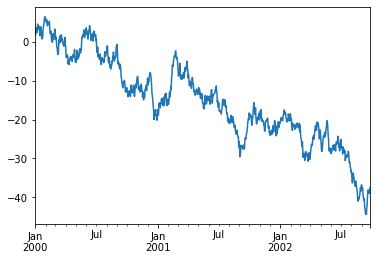

In [69]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

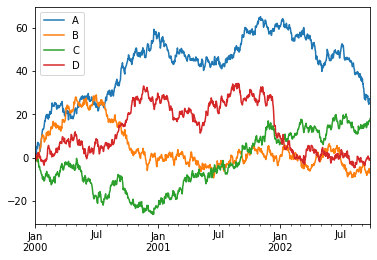

In [70]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')